In [1]:
import numpy as np
import pandas as pd
from functools import partial
from scipy.stats import norm
from matplotlib import pyplot as plt
import time
from scipy.optimize import brentq

Q1

1(a)

In [2]:
sigma,r,T = 0.2,0.01,1

In [3]:
#function to price price a European option with payoff g(ST) under the trinomial tree model
def trinomial_european_pricer(S0,g, lambd,sigma, r,T, N):

    V = np.zeros((2*N+1,N+1))
    S = np.zeros((2*N+1,N+1))

    dt = T/N
    u = np.exp(lambd*sigma*np.sqrt(dt))
    m = 1
    d = np.exp(-lambd*sigma*np.sqrt(dt))
    qu = 0.5/(lambd**2)+((r-0.5*sigma**2)*np.sqrt(dt)/(2*lambd*sigma))
    qm = 1-1/(lambd**2)
    qd = 0.5/(lambd**2)-((r-0.5*sigma**2)*np.sqrt(dt)/(2*lambd*sigma))
    R = np.exp(r*dt)

    S[N,0] = S0

    for t in range(1,N+1):
        for j in range(-t,t+1):
            S[N + j, t] = S0 * (u ** max(-j, 0)) * (d ** max(j, 0))

    V[:,N] = g(S[:,N])

    for t in reversed(range(N)):
        V[N-t:N+t+1, t] = (qu * V[N-t-1:N+t,t+1] + qm * V[N-t:N+t+1, t+1] + qd * V[N-t+1:N+t+2,t+1]) / R

    price = V[N,0]

    return price



(b)

In [4]:
#analytical pricer
def Black_Scholes_Call_Price(S0, sigma, r, T, K):
    d1 = np.log(S0/K)/(sigma*np.sqrt(T)) + (r/sigma + sigma/2)*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)
    return S0*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)

In [5]:
#calculate analytical price
S0=K=100
BS_call_price_100 = Black_Scholes_Call_Price(S0, sigma, r, T, K)
print('Black-Scholes Price: ', BS_call_price_100)

Black-Scholes Price:  8.433318690109608


In [6]:
#define payoff function
def CallPayoff(S, K=100):
    return np.maximum(S - K, 0)

S0 = 100
K = 100

N_values = [50, 100, 250, 500, 1000]

lambdas = [1.0, 1.25, 1.5, 1.75]

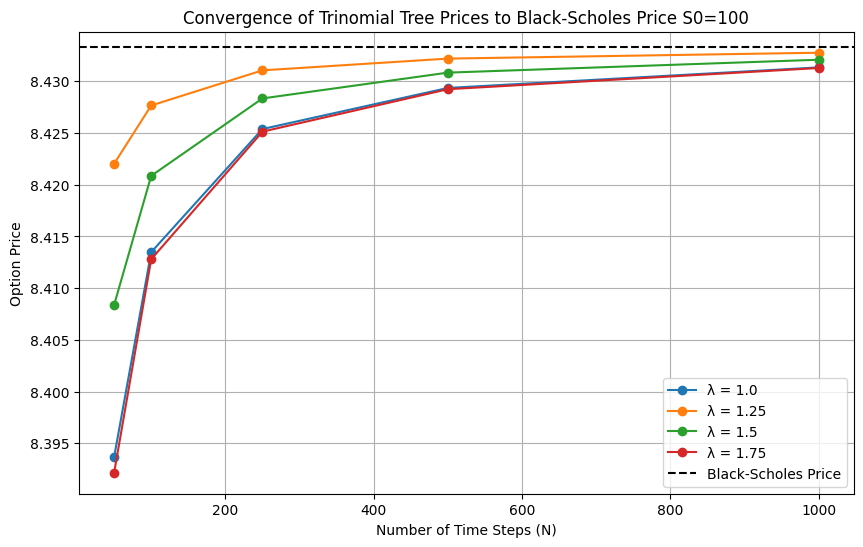

In [7]:
#plot for S0 =100
plt.figure(figsize=(10, 6))

for lambd in lambdas:
    trinomial_prices = []
    for N in N_values:
        trinomial_price = trinomial_european_pricer(S0,CallPayoff, lambd,sigma, r,T, N)
        trinomial_prices.append(trinomial_price)

    plt.plot(N_values, trinomial_prices, marker='o', label=f'λ = {lambd}')

plt.axhline(y=BS_call_price_100, color='black', linestyle='dashed', label="Black-Scholes Price")

plt.xlabel("Number of Time Steps (N)")
plt.ylabel("Option Price")
plt.title("Convergence of Trinomial Tree Prices to Black-Scholes Price S0=100")
plt.legend()
plt.grid(True)

plt.show()


In [8]:
from google.colab import files




0.27952126691005574


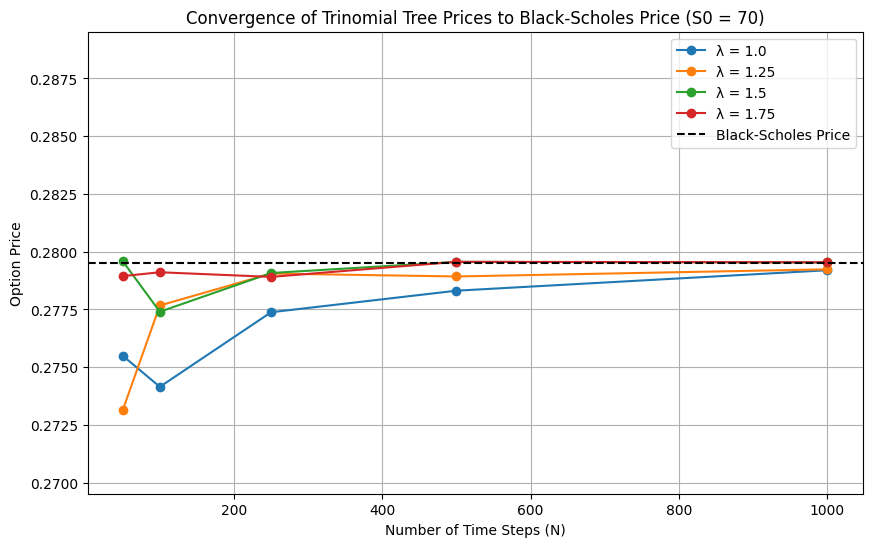

In [9]:
#plot for S0 =70
plt.figure(figsize=(10, 6))

for lambd in lambdas:
    trinomial_prices = []
    for N in N_values:
        trinomial_price = trinomial_european_pricer(70,CallPayoff, lambd,sigma, r,T, N)
        trinomial_prices.append(trinomial_price)

    plt.plot(N_values, trinomial_prices, marker='o', label=f'λ = {lambd}')
BS_call_price_70 = Black_Scholes_Call_Price(70, sigma, r, T, K)
print(BS_call_price_70)
plt.axhline(y=BS_call_price_70, color='black', linestyle='dashed', label="Black-Scholes Price")

plt.xlabel("Number of Time Steps (N)")
plt.ylabel("Option Price")
plt.title("Convergence of Trinomial Tree Prices to Black-Scholes Price (S0 = 70)")
plt.legend()
plt.ylim([BS_call_price_70-0.01,BS_call_price_70+0.01])

plt.grid(True)


plt.show()

31.896318617624175


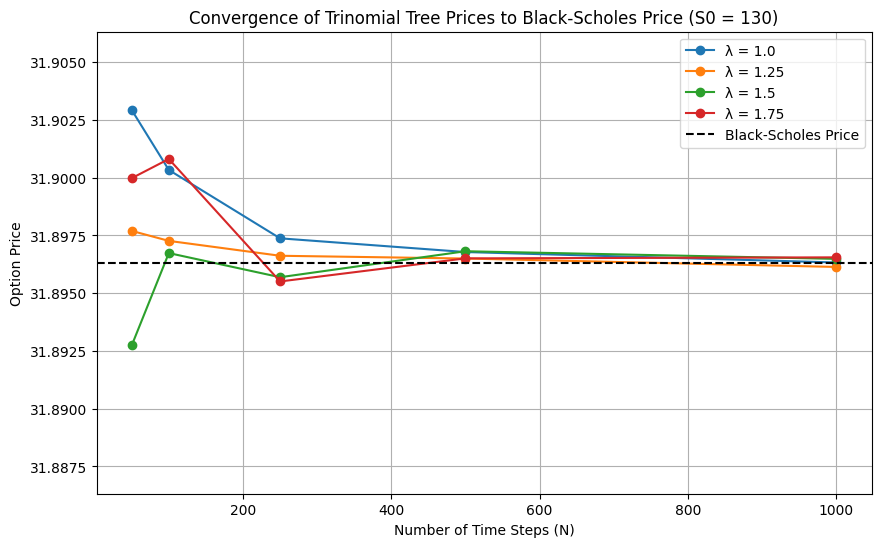

In [10]:
#plot for S0 =130
plt.figure(figsize=(10, 6))

for lambd in lambdas:
    trinomial_prices = []
    for N in N_values:
        trinomial_price = trinomial_european_pricer(130,CallPayoff, lambd,sigma, r,T, N)
        trinomial_prices.append(trinomial_price)

    plt.plot(N_values, trinomial_prices, marker='o', label=f'λ = {lambd}')
BS_call_price_130 = Black_Scholes_Call_Price(130, sigma, r, T, K)

plt.axhline(y=BS_call_price_130, color='black', linestyle='dashed', label="Black-Scholes Price")
print(BS_call_price_130)
plt.xlabel("Number of Time Steps (N)")
plt.ylabel("Option Price")
plt.title("Convergence of Trinomial Tree Prices to Black-Scholes Price (S0 = 130)")
plt.legend()
plt.grid(True)
plt.ylim([BS_call_price_130-0.01,BS_call_price_130+0.01])

plt.show()

(c)

In [11]:
N=500
K=100

In [12]:
#compute difference between calculated and analytical prices for differnt values of S0
S0_values = np.arange(70,135,5)
import pandas as pd

results =[]

for lambd in lambdas:
    for S0 in S0_values:
        trinomial_price = trinomial_european_pricer(S0,CallPayoff, lambd,sigma, r,T, N)
        bs_price = Black_Scholes_Call_Price(S0, sigma, r, T, K)
        diff = trinomial_price - bs_price
        results.append([S0, lambd, trinomial_price, bs_price, diff])

df_results = pd.DataFrame(results, columns=["S0", "Lambda", "Trinomial Price", "Black-Scholes Price", "Difference"])

In [13]:
df_results = df_results.pivot(index = 'Lambda',columns = 'S0', values = 'Difference' )

In [14]:
df_results

S0,70,75,80,85,90,95,100,105,110,115,120,125,130
Lambda,,,,,,,,,,,,,
1.00,-0.001211,-0.001518,0.001067,-0.001750,-0.001083,-0.000426,-0.003972,0.002222,0.002474,0.000274,-0.000100,0.001349,0.000462
1.25,-0.000595,-0.000256,-0.000974,0.000852,0.001322,0.001688,-0.001136,0.001649,0.001615,0.001252,0.000526,-0.000978,0.000182
1.50,0.000036,0.000259,0.000506,-0.000755,-0.000349,0.000053,-0.002492,0.001575,-0.000864,0.001298,0.000999,0.000619,0.000497
1.75,0.000038,0.000543,0.000257,0.001120,0.000592,0.000705,-0.004095,-0.001584,-0.001966,-0.001998,0.001022,0.000269,0.000189


In [15]:
#average absolute errors
df_results.abs().mean(axis=1)

,0
Lambda,
1.00,0.001378
1.25,0.001002
1.50,0.000793
1.75,0.001106


In [16]:
df_results.std(axis=1)

,0
Lambda,
1.00,0.001777
1.25,0.001084
1.50,0.001066
1.75,0.001552


In [17]:
#pick lambda = 1.5 as it gives smallest average absolute error
lambd = 1.5

2 (b)

In [18]:
#function to price american options
#also checks whether early exercise is optimal
def trinomial_american_pricer(S0, payoff, lambd, sigma, r, T, N):
    time0_exercise = False
    dt = T/N
    option_values = np.zeros((2*N+1, N+1))
    u, m, d = np.exp(lambd*sigma*np.sqrt(dt)), 1, np.exp(-lambd*sigma*np.sqrt(dt))
    qu = 0.5/(lambd**2)+((r-0.5*sigma**2)*np.sqrt(dt)/(2*lambd*sigma))
    qm = 1-1/(lambd**2)
    qd = 0.5/(lambd**2)-((r-0.5*sigma**2)*np.sqrt(dt)/(2*lambd*sigma))
    terminal_stock_vals = [S0*(u**(N-k)) for k in range(N)] + [S0] + [S0*(d**k) for k in range(1, N+1)]
    option_values[:, -1] = [payoff(terminal_stock_val) for terminal_stock_val in terminal_stock_vals]
    for i in reversed(range(N)):
        for j in range(N-i, N+i+1):
            continuation_val = np.exp(-r*dt)*(qu*option_values[j-1][i+1]+qm*option_values[j][i+1]+qd*option_values[j+1][i+1])
            option_values[j, i] = np.maximum(payoff(terminal_stock_vals[j]), continuation_val)
            if i == 0:
                if payoff(terminal_stock_vals[N]) > continuation_val:
                    time0_exercise = True
    return option_values[N, 0], time0_exercise

#check whether early exercise is optimal
K = 100
N = 500
sigma = 0.2
r = 0.01
def calls(S, strike):
    return np.maximum(S-strike, 0)
call = partial(calls, strike=K)
american_call_prices = []
intrinsic_call_values = []
S0s = np.arange(50, 150, 10)
for S0 in S0s:
    tree_price, exercise = trinomial_american_pricer(S0, call, lambd, sigma, r, T, N)
    american_call_prices.append(tree_price)
    intrinsic_call_values.append(call(S0))
    print(S0, exercise)

50 False
60 False
70 False
80 False
90 False
100 False
110 False
120 False
130 False
140 False


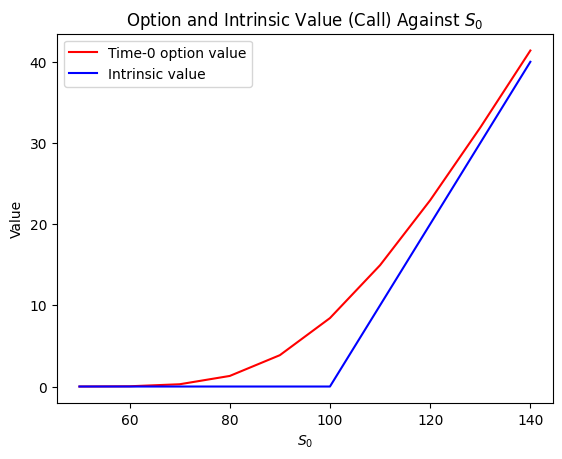

In [19]:
#plot
plt.plot(S0s, american_call_prices, c='r', label='Time-0 option value')
plt.plot(S0s, intrinsic_call_values, c='b', label='Intrinsic value')
plt.title(r'Option and Intrinsic Value (Call) Against $S_0$')
plt.ylabel('Value')
plt.xlabel(r'$S_0$')
plt.legend();

(c)

50 True
60 True
70 True
80 False
90 False
100 False
110 False
120 False
130 False
140 False


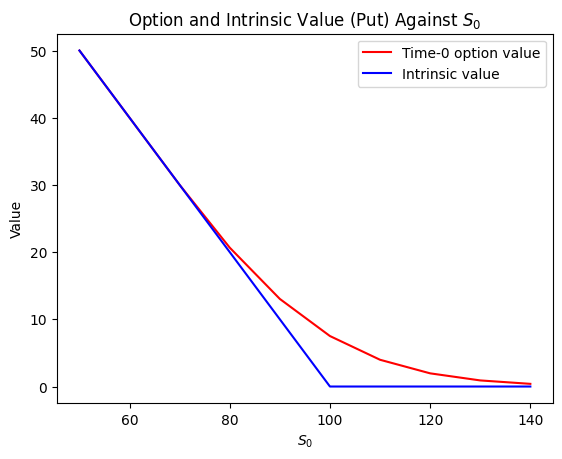

In [20]:
#put payoff function
def puts(S, strike):
    return np.maximum(strike-S, 0)

put = partial(puts, strike=K)
american_put_prices = []
intrinsic_put_values = []

#check whether early exercise is optimal
for S0 in S0s:
    tree_price, exercise = trinomial_american_pricer(S0, put, lambd, sigma, r, T, N)
    american_put_prices.append(tree_price)
    intrinsic_put_values.append(put(S0))
    print(S0, exercise)

#plot
plt.plot(S0s, american_put_prices, c='r', label='Time-0 option value')
plt.plot(S0s, intrinsic_put_values, c='b', label='Intrinsic value')
plt.title(r'Option and Intrinsic Value (Put) Against $S_0$')
plt.ylabel('Value')
plt.xlabel(r'$S_0$')
plt.legend();

We see it is optimal to exercise early when S0 less than or equal to 70

50 True
60 True
70 True
80 True
90 True
100 False
110 False
120 False
130 False
140 False


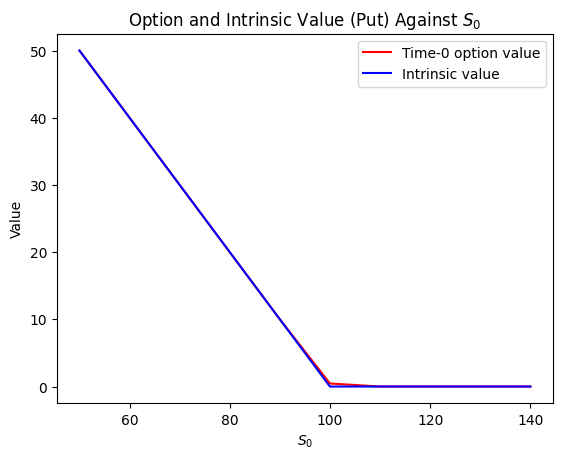

In [21]:
#change volatility and interest rate
sigma = 0.05
r = 0.1

put = partial(puts, strike=K)
american_put_prices = []
intrinsic_put_values = []

for S0 in S0s:
    tree_price, exercise = trinomial_american_pricer(S0, put, lambd, sigma, r, T, N)
    american_put_prices.append(tree_price)
    intrinsic_put_values.append(put(S0))
    print(S0, exercise)

plt.plot(S0s, american_put_prices, c='r', label='Time-0 option value')
plt.plot(S0s, intrinsic_put_values, c='b', label='Intrinsic value')
plt.title(r'Option and Intrinsic Value (Put) Against $S_0$')
plt.ylabel('Value')
plt.xlabel(r'$S_0$')
plt.legend();

We see the threshold at which early exercise is optimal increases

3(a)

Shooting grid function: j' = min(j+1, k')

In [ ]:
S0 = 100.
sigma = 0.2
r = 0.01

def trinomial_lookback_pricer(S0, lambd, sigma, r, T, N, type='e'):
    start = time.time()
    dt = T/N
    u, m = np.exp(lambd*sigma*np.sqrt(dt)), 1
    d = 1/u
    temp = (r-0.5*sigma**2)*np.sqrt(dt)/(2*lambd*sigma)
    qu = 0.5/(lambd**2)+temp
    qd = 0.5/(lambd**2)-temp
    qm = 1-qu-qd
    q = np.array([qd, qm, qu])

    option_values = np.zeros((N+1, 2*N+1))

    # Pre-computing powers of u
    S0u = np.array([S0 for _ in range(2*N+1)])
    for i in range(1, N+1):
        S0u[N-i] = S0u[N-i+1]*u
        S0u[N+i] = S0u[N+i-1]/u
    for j in range(N+1):
        for k in range(j, 2*N+1):
            option_values[j][k] = S0u[j]-S0u[k]
    if type == 'e':
        for n in reversed(range(1, N)):
            option_values_next = np.zeros((n+1, 2*n+1))
            for j in range(n+1):
                # Hard-coded shooting function & use of np.convolve for better performance
                option_values_next[j][j] = qu*option_values[j][j] + qm*option_values[j+1][j+1] + qd*option_values[j+1][j+2]
                option_values_next[j][j+1:] = np.convolve(option_values[j+1][j+1:], q, 'valid')
            option_values = option_values_next
        return np.exp(-r*T)*(qu*option_values[0][0] + qm*option_values[1][1] + qd*option_values[1][2]), time.time()-start
    elif type == 'a':
        for n in reversed(range(1, N)):
            option_values_next = np.zeros((n+1, 2*n+1))
            for j in range(n+1):
                option_values_next[j][j] = qu*option_values[j][j] + qm*option_values[j+1][j+1] + qd*option_values[j+1][j+2]
                execution_prices = S0u[N-n+j]-S0u[N-n+j:N+n+1]
                option_values_next[j][j+1:] = np.convolve(option_values[j+1][j+1:], q, 'valid')
                option_values_next[j][j:] = np.maximum(np.exp(-r*dt)*option_values_next[j][j:], execution_prices)
            option_values = option_values_next
        return np.exp(-r*dt)*(qu*option_values[0][0] + qm*option_values[1][1] + qd*option_values[1][2]), time.time()-start
    else:
        print('Invalid type')
    return None, None

Ns = [2, 5, 10, 25, 50, 100, 250, 500, 1000, 2500, 5000, 10000]
european_lb_prices, european_run_times = [], []
american_lb_prices, american_run_times = [], []
for N in Ns:
    print(f'N = {N}:')
    tree_european_lookback_price, run_time = trinomial_lookback_pricer(S0, lambd, sigma, r, T, N, 'e')
    european_lb_prices.append(tree_european_lookback_price)
    european_run_times.append(run_time)
    print('E ', run_time)
    tree_american_lookback_price, run_time = trinomial_lookback_pricer(S0, lambd, sigma, r, T, N, 'a')
    american_lb_prices.append(tree_american_lookback_price)
    american_run_times.append(run_time)
    print('A ', run_time)

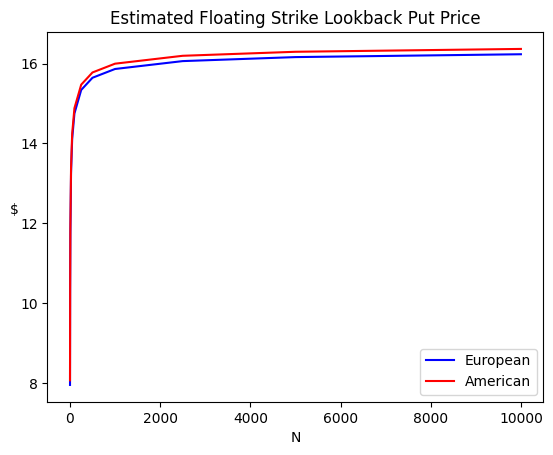

In [23]:
Ns = [2, 5, 10, 25, 50, 100, 250, 500, 1000, 2500, 5000, 10000]
european_lb_prices = [7.94696994, 10.25310304, 11.73646898, 13.26369709, 14.11469075, 14.75088257,
                      15.33991707, 15.64567554, 15.86551348, 16.06311994, 16.16362172, 16.2350558]
american_lb_prices = [8.06286432, 10.38529567, 11.86850698, 13.3951443, 14.24645061, 14.88306772,
                      15.47245893, 15.77848531, 15.99853436, 16.1963398, 16.29694716, 16.36845812]

plt.plot(Ns, european_lb_prices, c='b')
plt.plot(Ns, american_lb_prices, c='r')
plt.title('Estimated Floating Strike Lookback Put Price')
plt.ylabel('$', rotation=0)
plt.xlabel('N')
plt.legend(['European', 'American']);

Q2

In [24]:
S0 = 100.
sigma = 0.2
r = 0.01

In [25]:
#local volatility function
def local_vol(t,s):
    return (1+t/30)*(0.1+0.4*np.exp(-s/50))

#copied TDMA solver code
def TDMAsolver(a, b, c, d):

    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1]
        dc[it] = dc[it] - mc*dc[it-1]

    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

#function to implement theta scheme
def theta_scheme(K,T,N,M,r,theta,local_vol_func):
    dx,dt = (s_max-s_min)/M,T/N
    ss = np.linspace(s_min,s_max,M+1)
    ts = np.linspace(0,T,N+1)

    sigmas = np.array([local_vol_func(T-t, ss) for t in ts])
    Vs = np.zeros((M+1,N+1))
    Vs[:,0] = np.maximum(ss-K,0)

    for j in range(1, N+1):
        t = j*dt
        l,u = 0,s_max - K*np.exp(-r*t)
        As = 0.5 * sigmas[j-1]**2 * dt / dx**2 * ss**2 - 0.5 * r * dt/ dx * ss
        Bs = - sigmas[j-1]**2 * dt / dx**2 * ss**2 - r * dt
        Cs = 0.5 * sigmas[j-1]**2 * dt / dx**2 * ss**2 + 0.5 * r * dt/ dx * ss
        if j == 1:
            L_prev = np.diag(np.concatenate([As[1:-1], [0]]), -1) + np.diag(np.concatenate([[0], Bs[1:-1], [0]]), 0) + np.diag(np.concatenate([[0], Cs[1:-1]]), 1)
        else:
            L_prev = L
        As = 0.5 * sigmas[j]**2 * dt / dx**2 * ss**2 - 0.5 * r * dt/ dx * ss
        Bs = - sigmas[j]**2 * dt / dx**2 * ss**2 - r * dt
        Cs = 0.5 * sigmas[j]**2 * dt / dx**2 * ss**2 + 0.5 * r * dt/ dx * ss
        A_diag = np.concatenate([As[1:-1], [0]])
        B_diag = np.concatenate([[0], Bs[1:-1], [0]])
        C_diag = np.concatenate([[0], Cs[1:-1]])
        L = np.diag(A_diag, -1) + np.diag(B_diag, 0) + np.diag(C_diag, 1)

        D = (np.eye(M+1) + (1-theta)*L_prev)@ np.hstack(([l], Vs[1:-1, j-1], [u]))

        Vs[:, j]= TDMAsolver(-theta*A_diag, 1-theta*B_diag, -theta*C_diag, D)

    return Vs[:,-1]


In [26]:
#calculate prices
K, r, T = 100, 0.01, 1
s_min, s_max = 10, 300
N, M = 1000, 100

ss = np.linspace(s_min, s_max, M+1)
ts = np.linspace(0, T, N+1)

prices = theta_scheme(K, T, N, M, r, 1/2, local_vol)

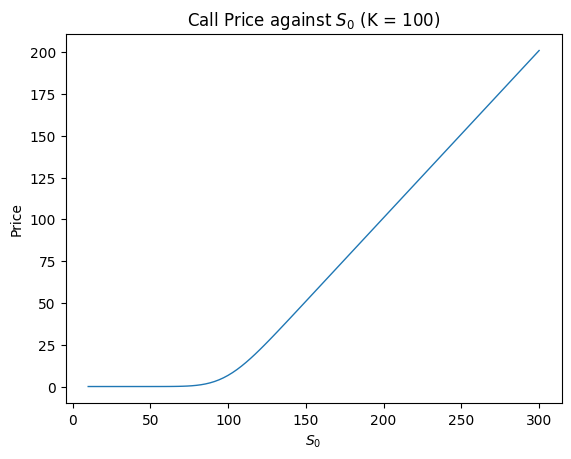

In [27]:
#plot to check we get expected graph
plt.plot(ss, prices, linewidth=1)
plt.title(r'Call Price against $S_0$ (K = 100)')
plt.ylabel('Price')
plt.xlabel(r'$S_0$');

In [28]:
#interpolation function
#allows us to calculate theta scheme prices option value for specific S0 values
def price_interpolation(ss, prices, x):
    dx = ss[1]-ss[0]
    index = int((x-ss[0])//dx)
    if index == len(ss)-1:
        return ss[-1]
    else:
        w = (ss[index+1]-x)/dx
        return w*prices[index] + (1-w)*prices[index+1]

#calculate prices of european call option for different S0s
prices2 = np.zeros((3, 9))
for i, theta in enumerate([0, 1/2, 1]):
    prices = theta_scheme(K, T, N, M, r, theta, local_vol)
    for j, S0 in enumerate(np.arange(80, 125, 5)):
        prices2[i][j] = price_interpolation(ss, prices, S0)
price_df = pd.DataFrame(prices2, columns = np.arange(80, 125, 5), index = [0,1/2,1])

In [29]:
price_df

,80,85,90,95,100,105,110,115,120
0.0,0.754621,1.475199,2.653957,4.377983,6.711123,9.713069,13.281132,17.315247,21.713630
0.5,0.754875,1.475167,2.653541,4.377234,6.710222,9.712274,13.280615,17.315058,21.713707
1.0,0.755130,1.475137,2.653126,4.376484,6.709321,9.711479,13.280099,17.314869,21.713783


2 (a)

In [30]:
#functions to calculate implied volatility
def objective(sigma, S0, r, T, K, MKT):
    return Black_Scholes_Call_Price(S0, sigma, r, T, K)-MKT

def get_iv(S0, K, r, T, C):
    upper_lim = 1
    while Black_Scholes_Call_Price(S0, upper_lim, r, T, K) < 0:
        upper_lim += 1
    result = brentq(objective, a=1e-8, b=upper_lim, args=(S0, r, T, K, C))
    return result

(b)

In [31]:
S0 = 100
Ks = np.linspace(70, 130, 13)
prices3, implied_volatilities = np.zeros(len(Ks)), np.zeros(len(Ks))
for i, K in enumerate(Ks):
    prices = theta_scheme(K, T, N, M, r, 1, local_vol)
    prices3[i] = price_interpolation(ss, prices, S0)
    implied_volatilities[i] = get_iv(S0, K, r, T, prices3[i])

In [32]:
implied_volatilities

array([0.17863849, 0.17425855, 0.16973465, 0.16594298, 0.16289703,
       0.15968395, 0.15632585, 0.15411662, 0.15188134, 0.14947478,
       0.14727575, 0.14580019, 0.14411142])

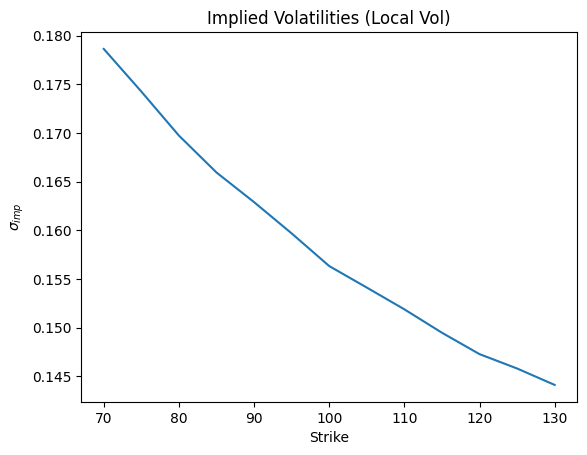

In [33]:
#implied vol plot for local vol
plt.plot(Ks, implied_volatilities)
plt.title('Implied Volatilities (Local Vol)')
plt.ylabel(r'$\sigma_{imp}$')
plt.xlabel('Strike');
plt.savefig('22b.png')

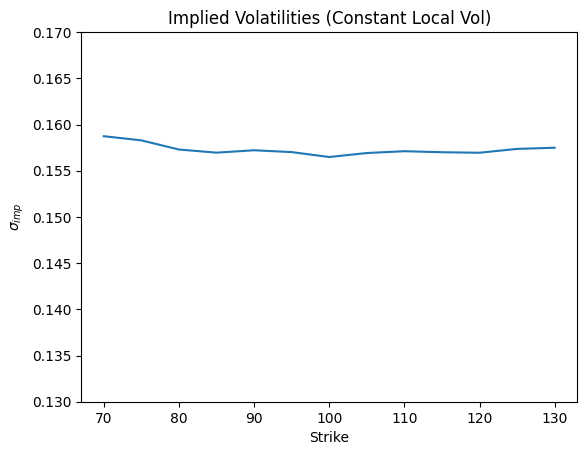

In [34]:
#function for constant volatility
def local_vol2(t, s):
    return 0.157

S0 = 100
Ks = np.linspace(70, 130, 13)
prices4, implied_volatilities_constant = np.zeros(len(Ks)), np.zeros(len(Ks))
for i, K in enumerate(Ks):
    prices = theta_scheme(K, T, N, M, r, 1, local_vol2)
    prices4[i] = price_interpolation(ss, prices, S0)
    implied_volatilities_constant[i] = get_iv(S0, Ks[i], r, T, prices4[i])

#plot implied vol for constant volatility model
plt.plot(Ks, implied_volatilities_constant)
plt.title('Implied Volatilities (Constant Local Vol)')
plt.ylabel(r'$\sigma_{imp}$')
plt.xlabel('Strike')
plt.ylim((0.13, 0.17));
plt.savefig('22b2.png')

3 (b)

In [35]:
#function to calculate down and out prices
def down_and_out_barrier_theta_scheme(K, B, T, N, M, r, theta, local_vol):
    dx, dt = (s_max-B)/M, T/N
    ss = np.linspace(B, s_max, M+1)
    ts = np.linspace(0, T, N+1)

    sigmas = np.array([local_vol(t, ss) for t in ts])
    Vs = np.zeros((M+1, N+1))

    Vs[:, 0] = np.maximum(K-ss, 0)
    Vs[0, 0] = 0    # Value = 0 if stock reaches barrier

    # Boundary conditions for down-and-out barrier put option
    l, u = 0, 0

    for j in range(1, N+1):
        t = j*dt

        As = 0.5 * sigmas[j-1]**2 * dt / dx**2 * ss**2 - 0.5 * r * dt/ dx * ss
        Bs = - sigmas[j-1]**2 * dt / dx**2 * ss**2 - r * dt
        Cs = 0.5 * sigmas[j-1]**2 * dt / dx**2 * ss**2 + 0.5 * r * dt/ dx * ss
        if j == 1:
            L_prev = np.diag(np.concatenate([As[1:-1], [0]]), -1) + np.diag(np.concatenate([[0], Bs[1:-1], [0]]), 0) + np.diag(np.concatenate([[0], Cs[1:-1]]), 1)
        else:
            L_prev = L

        As = 0.5 * sigmas[j]**2 * dt / dx**2 * ss**2 - 0.5 * r * dt/ dx * ss
        Bs = - sigmas[j]**2 * dt / dx**2 * ss**2 - r * dt
        Cs = 0.5 * sigmas[j]**2 * dt / dx**2 * ss**2 + 0.5 * r * dt/ dx * ss
        A_diag = np.concatenate([As[1:-1], [0]])
        B_diag = np.concatenate([[0], Bs[1:-1], [0]])
        C_diag = np.concatenate([[0], Cs[1:-1]])
        L = np.diag(A_diag, -1) + np.diag(B_diag, 0) + np.diag(C_diag, 1)

        D = (np.eye(M+1) + (1-theta)*L_prev)@ np.hstack(([l], Vs[1:-1, j-1], [u]))

        Vs[:, j]= TDMAsolver(-theta*A_diag, 1-theta*B_diag, -theta*C_diag, D)
    return Vs[:, -1]


K, r, T = 100, 0.01, 1
s_max = 300
N, M = 250, 500

ts = np.linspace(0, T, N+1)

Bs = [60, 70, 80, 90]
barrier_prices = np.zeros((2, len(Bs)))

call_prices = theta_scheme(K, T, N, M, r, 1, local_vol)
put_price1 = price_interpolation(np.linspace(10, 300, M+1), call_prices, S0) - S0 + K*np.exp(-r*T) # Using Put-Call Parity

call_prices = theta_scheme(K, T, N, M, r, 1, local_vol2)
put_price2 = price_interpolation(np.linspace(10, 300, M+1), call_prices, S0) - S0 + K*np.exp(-r*T)

for i, B in enumerate(Bs):
    ss = np.linspace(B, s_max, M+1)

    prices = down_and_out_barrier_theta_scheme(K, B, T, N, M, r, 1, local_vol)
    barrier_prices[0][i] = put_price1 - price_interpolation(ss, prices, S0)

    prices = down_and_out_barrier_theta_scheme(K, B, T, N, M, r, 1, local_vol2)
    barrier_prices[1][i] = put_price2 - price_interpolation(ss, prices, S0)

In [36]:
print(barrier_prices)
print('Percentage difference (constant local vol as baseline): ')
print(100*(barrier_prices[0]-barrier_prices[1])/barrier_prices[1])

[[0.23220345 1.2317361  3.50658408 5.45818049]
 [0.04931024 0.7115421  3.10109393 5.42708481]]
Percentage difference (constant local vol as baseline): 
[370.90312686  73.10797246  13.0757134    0.57297207]
